# Part 1

In [1]:
import numpy as np

# input x array, output: harmonic potential array

def potential_qho(x: np.ndarray) -> np.ndarray:

    v = x**2
    
    return v

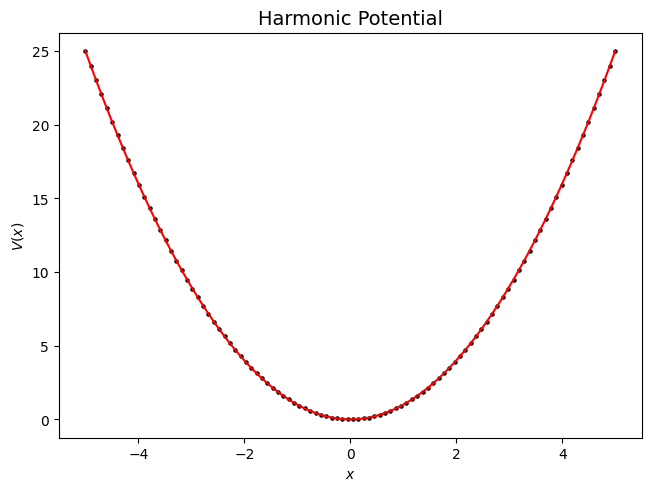

In [2]:
import matplotlib.pyplot as plt

# This enforces figure layout including title and label sizes throughout the notebook

plt.rc('axes', titlesize=14)     
plt.rc('axes', labelsize=10)    
plt.rc('xtick', labelsize=10)    
plt.rc('ytick', labelsize=10)    
plt.rc('legend', fontsize=10)
plt.rc('figure', titlesize=16)

plt.rcParams['figure.constrained_layout.use'] = True


# plot the harmonic potential

# thoughout the code plotting functions have no return type

def plot_qho_potential(x_min: float,x_max: float,N: int) -> None:
    
    x_values = np.linspace(x_min,x_max,N)
    
    v_values= potential_qho(x_values)

    fig, ax = plt.subplots()

    ax.set(xlabel='$x$',ylabel='$V(x)$',title='Harmonic Potential')

    # scatter plot used to demonstrate discrete nature of code

    ax.scatter(x_values,v_values,color='black',s=5)

    ax.plot(x_values,v_values,color='red')

# plotted over a suitable range to demonstrate the function -5,5

plot_qho_potential(-5,5,100)

plt.show()


# Part 2

In [3]:

# input: x array and potential array, output: H matrix

def hamiltonian(x: np.ndarray,v: np.ndarray) -> np.ndarray:

    #construct matricies

    N = len(x)

    V = np.zeros((N,N))
    D = np.zeros((N,N))

    dx = x[1] - x[0] # assumes equal spacing (which is fine)


    for i in range(N):

        #Defining the potential matrix from array V(x_i)

        V[i][i] = v[i]

        #Defining D matrix

        D[i][i] = 2/((dx)**2)

        if i-1 >= 0:
            D[i][i-1] = -1/((dx)**2)
            
        if i+1 < N:   
            D[i][i+1] = -1/((dx)**2)

    #add matricies and return H

    H = D + V
        
    return H



In [4]:
# short array example

# defining a x range with very small N to display matrix format

x_values_example = np.linspace(-5,5,5) 

v_values_example = potential_qho(x_values_example)

H = hamiltonian(x_values_example,v_values_example)

print(H)

[[25.32 -0.16  0.    0.    0.  ]
 [-0.16  6.57 -0.16  0.    0.  ]
 [ 0.   -0.16  0.32 -0.16  0.  ]
 [ 0.    0.   -0.16  6.57 -0.16]
 [ 0.    0.    0.   -0.16 25.32]]


# Part 3

### Note

### i)

The expected eigen values for a harmonic oscillator are ([Quantum Harmonic Oscillator](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator)):

$$(n+\frac{1}{2})\hbar{}\omega{}$$

since energy is in units of $ \frac{1}{2}\hbar{}\omega{}$ this yeilds odd numbers as the expected eigen values:

$$ 1, 3, 5, 7, ... $$

### ii)

For Part 3, 4 and E.1, I decide to use the eigen problem solver sp.linalg.eigh(), shown in the second part of my extension (E.2) this is not actually the most efficient way to solve the problem. However, I have stuck with it since it fits the format of the hamiltonian function that makes the code clear and easily readable. Furthermore, in this exercise there is not a need for high accuracy (hence high N).



In [5]:
import scipy as sp # eigenvalues and eigenvectors

# input: x range, N points, output: eigen values, eigen vectors, x values (useful for plotting)

def harmonic_eigen_val_vec(x_min: float,x_max: float,N: int) -> tuple:
    
    x_values = np.linspace(x_min,x_max,N)
    
    v_values = potential_qho(x_values)

    # define hamiltonian
    
    H = hamiltonian(x_values,v_values)

    # compute eigen values and vectors using scipy function
    
    eigen_values, eigen_vectors = sp.linalg.eigh(H)

    return eigen_values, eigen_vectors, x_values


# input: Number of expected values to compute, output: expected values for harmonic oscillator

def expected_harmonic_eigen_val(N_values: int) -> np.ndarray:

    # defined as the first N_values odd numbers, consequence of explanation in markdown cell 

    expected = np.linspace(1,(2*N_values - 1),N_values)

    return expected



In [6]:
import pandas as pd # for table

# input: eigen values, expected eigen values, output: table to compare values including % error 

def eigen_vector_table(eigen_values,expected_values) -> pd.DataFrame:

    percentage_error = abs((1 - (eigen_values/expected_values)) * 100)

    data = {f'Calculated':eigen_values,f'Expected':expected_values,'Error (%)':percentage_error}

    table = pd.DataFrame(data)

    return table


# run functions and compare eigen values to expected harm

harmonic_eigen_val, harmonic_eigen_vec, harmonic_x_values = harmonic_eigen_val_vec(-6,6,1000)

expected_vals = expected_harmonic_eigen_val(10)

harm_table = eigen_vector_table(harmonic_eigen_val[0:10],expected_vals)

print('-------------------------------------------------------------------------------------')
print('Eigen values of the Harmonic Oscillator, Computed vs Expected, Units: 1/2 hbar omega')
print('-------------------------------------------------------------------------------------')
print(harm_table)
print('-------------------------------------------------------------------------------------')

-------------------------------------------------------------------------------------
Eigen values of the Harmonic Oscillator, Computed vs Expected, Units: 1/2 hbar omega
-------------------------------------------------------------------------------------
   Calculated  Expected  Error (%)
0    0.999991       1.0   0.000902
1    2.999955       3.0   0.001503
2    4.999883       5.0   0.002345
3    6.999775       7.0   0.003221
4    8.999630       9.0   0.004108
5   10.999450      11.0   0.005001
6   12.999234      13.0   0.005895
7   14.998983      15.0   0.006779
8   16.998708      17.0   0.007601
9   18.998458      19.0   0.008116
-------------------------------------------------------------------------------------


### Note

Referencing:

[Scipy Doc for sp.sp.linalg.eigh](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html)

'every eigenvalue λ (i-th entry of w) and its eigenvector vi (i-th column of v)'

hence probability_density() selects the ith column of computed eigen vectors.

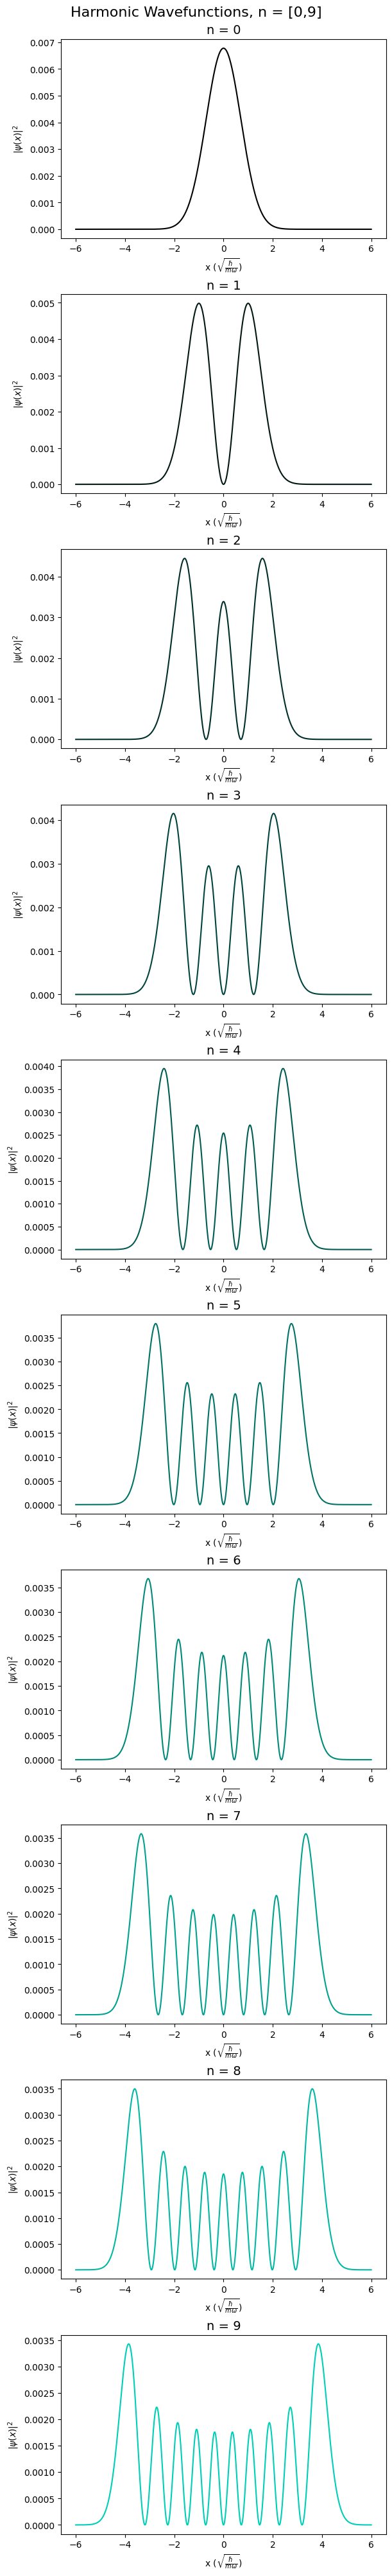

In [7]:

# input: columb index - corrosponds to a quantum number or set of quatum numbers (Part 4), eigen vectors, output: probability distribution

def probability_density(i: int,eigen_vectors: np.ndarray) -> np.ndarray:

    # select ith column and find modulus squared. 

    psi_squared = np.conj(eigen_vectors[:,i]) * eigen_vectors[:,i] 

    return psi_squared 


# plot wave functions for a given range of n values (0 -> n_tot)

def plot_harmonic_wavefunction(n_tot: int, x_values: np.ndarray, eigen_vectors: np.ndarray) -> None:

    # define size of axis based on chosen n_tot
    
    fig, axs = plt.subplots(n_tot,1,figsize=(6,4*n_tot))

    fig.suptitle(f'Harmonic Wavefunctions, n = [0,{n_tot-1}]')

    for n in range(0,n_tot):

        prob = probability_density(n,eigen_vectors)

        # determine color based on current n value

        axs[n].plot(x_values,prob,color=(0,0.9*n/n_tot,0.8*n/n_tot))

        axs[n].set(xlabel=r'x ($\sqrt{\frac{\hbar}{m \omega}})$',ylabel=r'$|\psi(x)|^2$',title=f'n = {n}')
    

N_plots = 10

plot_harmonic_wavefunction(N_plots, harmonic_x_values, harmonic_eigen_vec)

plt.show()

# Part 4

In [8]:
# input r values, l value, ouput: columb potential array

def coloumb_potential(r: np.ndarray,l: np.ndarray) -> np.ndarray:
    
    v = - 2/r + l*(l+1) / (r)**2

    return v

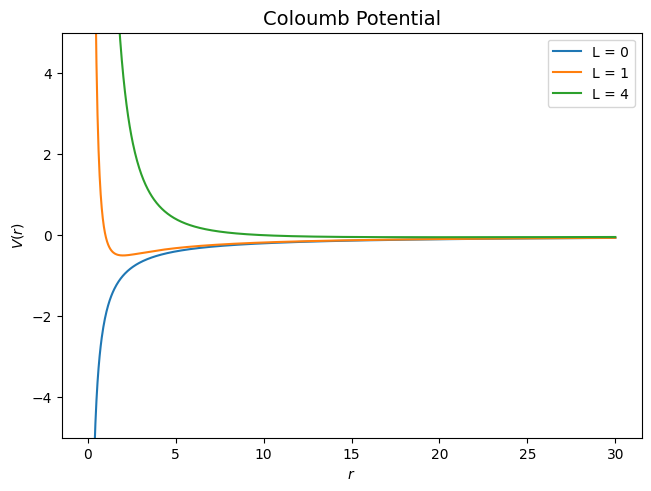

In [9]:
# Helpful to display this potential for a few l values

def plot_columb_potential(l_values: list, maxR: float, N: int) -> None:

    r = np.linspace(0.01,maxR,N)

    fig, ax = plt.subplots()

    ax.set(ylim=(-5,5))

    for l in l_values:

        v = coloumb_potential(r,l)

        ax.set(xlabel='$r$',ylabel='$V(r)$',title="Coloumb Potential")

        ax.plot(r,v,label=f'L = {l}')

    ax.legend()

example_l_values = [0,1,4] # list of l values to be displayed

plot_columb_potential(example_l_values,30,1000)

plt.show()

### Note

In part 4 i have only considered the case l = 0, in the extension i consider the case l > 0.

Atomic wavefunctions where l = 0 are named s orbitals.

I compared results in this section to: [s orbitals](https://phys.libretexts.org/Bookshelves/Quantum_Mechanics/Advanced_Quantum_Mechanics_(Kok)/14%3A_Atomic_Orbitals/14.3%3A_Visualizing_Orbitals/14.3.1%3A_s_Orbitals)

the key issue to overcome here is that for r -> 0 V(r) -> -inf, as a result we start from a value just past 0 at 1/N

To compute expected eigenvalues: 

$$ E_n = \frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2} \frac{1}{n^2}$$

Hence the first few eigenvalues are defined by a linspace using:

$$\frac{1}{n^2}$$ 
with
$$ n = 1, 2, 3,... $$



In [10]:

# The functions in this cell are also applicaple to l > 0 but have been used only for l = 0 here.

# input: l, max R, N points, energy eigen values and vectors

def atomic_eigen_val_vec(l: int, max_R: float, N: int) -> tuple:
    
    x_values = np.linspace(1/N,max_R,N)
    
    v_values = coloumb_potential(x_values,l) 

    # define hamiltonian
    
    H = hamiltonian(x_values,v_values)

    # compute eigen values and vectors using scipy function
    
    eigen_values, eigen_vectors = sp.linalg.eigh(H)

    return eigen_values, eigen_vectors

# input: value of quantum number l, number of expected eigen values to compute, output: first N expected eigen values

def expected_atomic_eigen_val(l: int, N_values: int) -> np.ndarray:

    # l = 0 case considered separately due to n_min = 0, hence 1/(0**2) -> inf

    if l == 0:

        expected = np.array([-np.inf])
        expected = np.append(expected,-np.array([1/(n**2) for n in range(1,N_values)]))

    else:
        expected = np.array([-1/(n**2) for n in range(l+1,N_values+(l+1))])

    return expected

# calculate and display in table
    
hydrogen_eigen_val, hyrdogen_eigen_vec = atomic_eigen_val_vec(0,200,1000)

hydro_expected_vals = expected_atomic_eigen_val(0,10)

hydro_table = eigen_vector_table(hydrogen_eigen_val[0:10],hydro_expected_vals)

print('-------------------------------------------------------------------------------------')
print('Eigen values of the Hydrogen Atom, Computed vs Expected, (n, l, m) = (n, 0, 0)')
print('-------------------------------------------------------------------------------------')
print(hydro_table)
print('-------------------------------------------------------------------------------------')

    

-------------------------------------------------------------------------------------
Eigen values of the Hydrogen Atom, Computed vs Expected, (n, l, m) = (n, 0, 0)
-------------------------------------------------------------------------------------
    Calculated  Expected   Error (%)
0 -1950.412264      -inf  100.000000
1    -0.980407 -1.000000    1.959330
2    -0.248133 -0.250000    0.746819
3    -0.110618 -0.111111    0.444139
4    -0.062305 -0.062500    0.312738
5    -0.039904 -0.040000    0.240367
6    -0.027724 -0.027778    0.194834
7    -0.020375 -0.020408    0.163645
8    -0.015603 -0.015625    0.142512
9    -0.012299 -0.012346    0.376255
-------------------------------------------------------------------------------------


### Note

The error is getting quite large here (ignoring n = 0 case), if we were to perform computational research we would likely want to increase the value of N far beyond 1000. 

As a result we would have to consider optimization oppituinies (see Extension). 

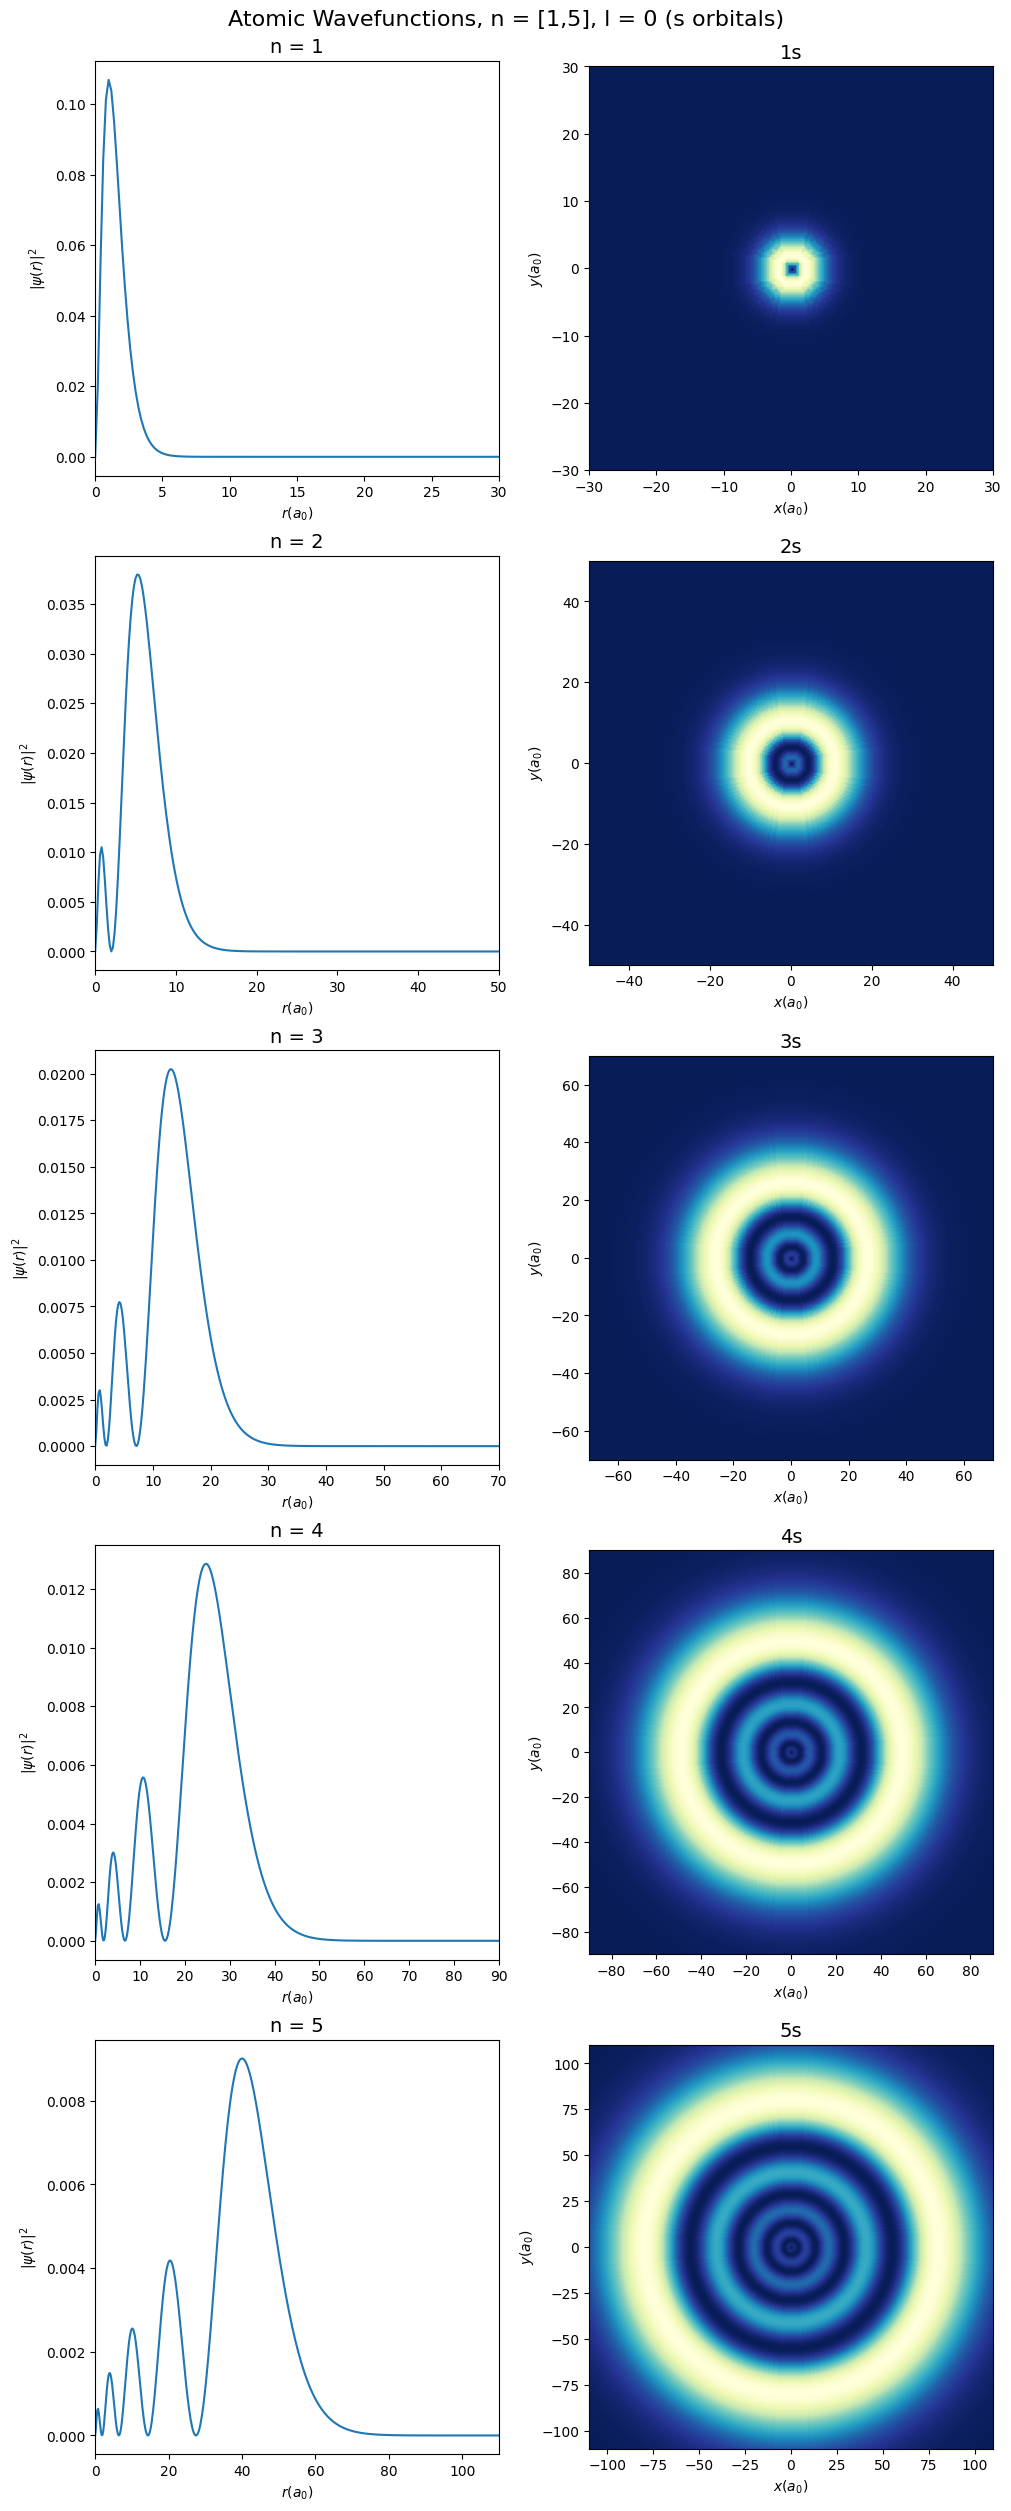

In [11]:

# input: n_max (plots wavefunctions for n = 1, ... n_max), max radius, N points, ouput: 1D and 2D wavefunctions (2D plots are based on 1D plots - radial symmetry)

def plot_atomic_s_orbitals(n_max: int, maxR: float, N: int) -> None: 

    # create figure

    fig, axs = plt.subplots(n_max,2,figsize=(10,5*n_max))

    fig.suptitle(f'Atomic Wavefunctions, n = [1,{n_max}], l = 0 (s orbitals)')

    # define r and v

    r_values = np.linspace(1/N,maxR,N)

    v_values = coloumb_potential(r_values,0)

    # loop through each n value, starting at n = 1 (ignore n = 0 case with dirac delta at 0)

    for n in range(1,n_max+1):

        H = hamiltonian(r_values,v_values)

        eigen_val, eigen_vec = sp.linalg.eigh(H)

        # define 1D wavefunction

        prob_r = probability_density(n,eigen_vec)

        #Checked normalisation here
        
        #print(sum(prob_r))

        # define 2D wavefunction based on 1D function

        prob_x_y = np.zeros((N,N))

        # downside of 2D plot: large N can take a fair bit of time here. 

        for i in range(N):
            for j in range(N):

                # this technique isn't perfect; discussed in Part 5

                x = int(i - N/2)
                y = int(j - N/2)

                r = int(np.sqrt(x**2 + y**2))
            
                prob_x_y[i][j] = prob_r[r]
                
        # plot 1D

        lim = 10 + 20*n  # set limit based on n value

        axs[n-1][0].plot(r_values,prob_r)
        axs[n-1][0].set(xlim=(0,lim),title=f'n = {n}',ylabel='$|\psi{}(r)|^2$',xlabel='$r(a_0)$')

        # plot 2D

        axs[n-1][1].imshow(prob_x_y,extent=[-maxR,maxR,-maxR,maxR],cmap=plt.cm.YlGnBu_r)
        axs[n-1][1].set(xlim=(-lim,lim),ylim=(-lim,lim),title=f'{n}s',xlabel='$x(a_0)$',ylabel='$y(a_0)$')


plot_atomic_s_orbitals(5,200,1000)

# the results align very nicely with the reference. 


# Extension 

I have included 2 parts to my extension 

### E.1 

Considers the case:

$$l > 0$$

Developing a function that takes any value of $n$ and $l$ and plots all corrosponding wavefunctions

### E.2

Considers possible improvement and optimization oppintunities, in particular the testing the caculation of eigen values using different scipy eigen solvers.



# E.1

The results in this section are compared to references: [p orbitals](https://phys.libretexts.org/Bookshelves/Quantum_Mechanics/Advanced_Quantum_Mechanics_(Kok)/14%3A_Atomic_Orbitals/14.3%3A_Visualizing_Orbitals/14.3.2%3A_p_Orbitals) and [d orbitals](https://phys.libretexts.org/Bookshelves/Quantum_Mechanics/Advanced_Quantum_Mechanics_(Kok)/14%3A_Atomic_Orbitals/14.3%3A_Visualizing_Orbitals/14.3.3%3A_d_Orbitals)

for l > 0, n must satisfy the condition: 

$$ n ≥ l + 1 $$

with

$$ n_{min} = l + 1 $$

Importantly this means when we compute eigen values for l > 0 the ith row of our result will not corrospond to the quantum number n

### Examples:

$$ \text{eigen vector column index }= i $$

$$ l = 1, i = 0, n = 2 $$

$$ l = 2, i = 1, n = 4 $$

In this case we will then define the index of the eigen vectors we want to access as:

$$ i = n - n_{min} $$

Table of values for a range of l values:

In [12]:
# we can use the same functions for expected values and eigen_vector_table defined previously.

# input: min and max l values, number of n values per l value, ouput: set of tables comparing eigen values.  


def l_tables(l_min: int, l_max: int, N_values: int) -> None:

    print('Eigen values of the Hydrogen Atom, Computed vs Expected, l > 0')

    for l in range(l_min, l_max+1):

        # using same previously defined functions:

        hydrogen_eigen_val, hyrdogen_eigen_vec = atomic_eigen_val_vec(l,200,1000)

        hydro_expected_vals = expected_atomic_eigen_val(l,N_values)

        hydro_table = eigen_vector_table(hydrogen_eigen_val[0:N_values],hydro_expected_vals)

        # we have the ability to do a chi squared test here:

        try:
            chi_squared,unknown = sp.stats.chisquare(hydrogen_eigen_val[0:N_values],hydro_expected_vals)
        except: 
            chi_squared = 'N/A'

        print('-------------------------------------------------------------------------------------')
        print(f'(n, l, m) = (n, {l}, m), χ2 = {chi_squared}')
        print('-------------------------------------------------------------------------------------')
        print(hydro_table)
        print('-------------------------------------------------------------------------------------')

# produce tables

l_tables(1,3,5)

Eigen values of the Hydrogen Atom, Computed vs Expected, l > 0
-------------------------------------------------------------------------------------
(n, l, m) = (n, 1, m), χ2 = -3.321547150331321e-07
-------------------------------------------------------------------------------------
   Calculated  Expected  Error (%)
0   -0.250210 -0.250000   0.084009
1   -0.111208 -0.111111   0.087060
2   -0.062550 -0.062500   0.079723
3   -0.040029 -0.040000   0.071413
4   -0.027796 -0.027778   0.063998
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
(n, l, m) = (n, 2, m), χ2 = -3.6572506595242797e-09
-------------------------------------------------------------------------------------
   Calculated  Expected  Error (%)
0   -0.111119 -0.111111   0.007421
1   -0.062508 -0.062500   0.012527
2   -0.040006 -0.040000   0.014891
3   -0.027782 -0.027778   0.015645
4   -0.020411 -0.02

Interesting to see the accuracy get better as l increases

Plotting the wavefunctions for l > 0:

### Note

In order to plot these oribtals correctly in 2D, we also consider the spherical harmonics using scipy [sp.special.sph_harm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html) and compute:

$$ P(r)_{l,m} = |\psi{}(r) Y_{l,m}|^2 = |\psi{}(r)|^2 \cdot{} |Y_{l,m}|^2 $$

For a set value of $l$ we define values of $m$ by: ([m values](http://hyperphysics.phy-astr.gsu.edu/hbase/qunoh.html))

$$ m = -l,-l+1,...0...,l-1,l$$

Although the 1D function is the same for all m values when n and l are constant, it's nice to demonstrate effect of the spherical harmonic.

This cell takes about 16s to run on my laptop.

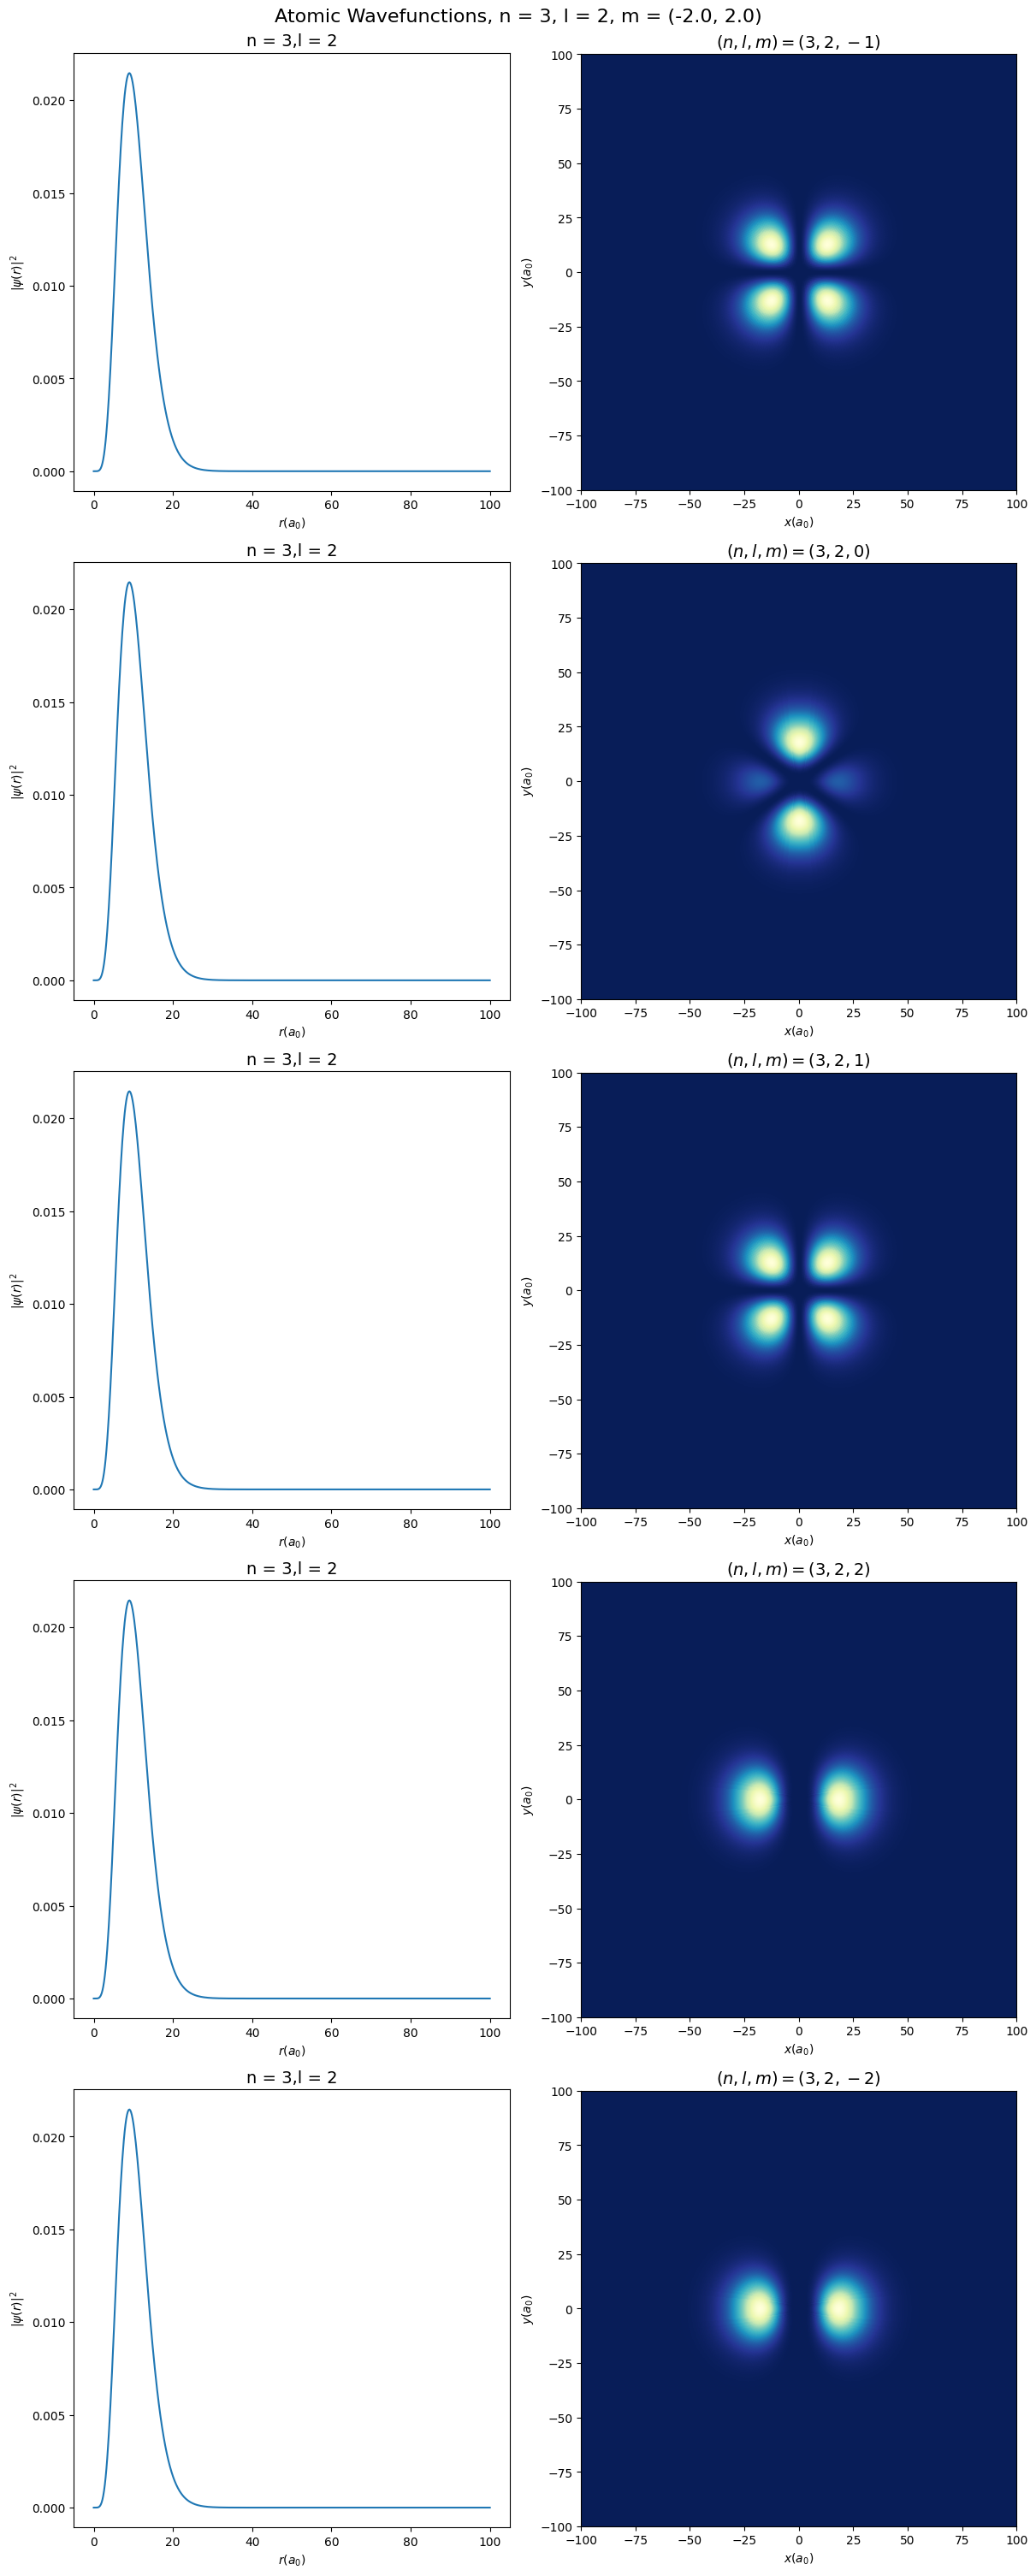

In [13]:
import scipy.special as sps # for spherical harmonic method

# a complete orbital plotting function :) 

def plot_atomic_orbital(n: int,l: int,maxR: float,N: int) -> None: 

    # correct way to define possible m values, consqeuence of angular momentum operator.

    m_vals = np.linspace(-l,l,(2*l)+1)

    plots = int(len(m_vals))

    fig, axs = plt.subplots(plots,2,figsize=(12,6*plots))

    fig.suptitle(f'Atomic Wavefunctions, n = {n}, l = {l}, m = {min(m_vals),max(m_vals)}')

    # define r values and find probability distribution.

    r_values = np.linspace(1/N,maxR,N)
    v_values = coloumb_potential(r_values,l)


    H = hamiltonian(r_values,v_values)

    eigen_val, eigen_vec = sp.linalg.eigh(H)

    index = n - (l+1)

    # error catch if a value l+1 > n

    if index < 0:

        return 'l must be smaller than n'

    # define 1D probability density

    prob_r = probability_density(index,eigen_vec)

    #print(sum(prob_r))

    # define probability intensity in 2D x-y intensity array

    prob_x_y = np.zeros((N,N))

    for m in m_vals:

        for i in range(N):
            for j in range(N):

                x = int(i - N/2)
                y = int(j - N/2)

                # caculate theta

                theta = np.arctan2(y, x)

                # change range from [-pi,pi] to [0,2pi]:

                if theta < 0:
                    theta += 2*np.pi

                Y_l_m = sps.sph_harm(m,l,np.pi,theta) #phi = constant (can be anything) as we are only considering probality ( |phase factor|^2 = 1 )

                # compute |Y_l_m|^2

                Y_l_m_squared = np.conj(Y_l_m) * Y_l_m

                # define 2D probability based on value of r. 
                
                r = int(np.sqrt(x**2 + y**2))
                
                prob_x_y[i][j] = prob_r[r]  * np.abs(Y_l_m_squared)

        # ploting:
        
        if plots != 1:
            axs[int(m+1)][1].imshow(prob_x_y,extent=[-maxR,maxR,-maxR,maxR],cmap=plt.cm.YlGnBu_r)
            axs[int(m+1)][1].set(title=f'$(n, l, m) = ({n}, {l}, {int(m)})$',xlabel='$x(a_0)$',ylabel='$y(a_0)$')

            axs[int(m+1)][0].plot(r_values,prob_r)
            axs[int(m+1)][0].set(title=f'n = {n},l = {l}',ylabel='$|\psi{}(r)|^2$',xlabel='$r(a_0)$')
            

        else:
            axs.imshow(prob_x_y,extent=[-maxR,maxR,-maxR,maxR],cmap=plt.cm.YlGnBu_r)
            axs.set(title=f'$(n, l, m) = ({n}, {l}, {int(m)})$',xlabel='$x(a_0)$',ylabel='$y(a_0)$')


# now we have a function that can plot any orbitals which is nice :)

maxR = 100
N = 500

# example p orbitals (l=1)
#plot_atomic_orbital(3,1,maxR,N)

# example d orbitals (l=2)
plot_atomic_orbital(3,2,maxR,N) # a nice example :)

# E.2

Throughout the program I chose to use the function [scipy.linalg.eigh](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html#scipy.linalg.eigh). This function works nicely for our problem particularly when looking to display graphs for a range of n/l values.

However, since it computes all eigenvalues and we only need the first few, it is doing a lot more work than we need it to. 

Additionally, our hamiltonian is defined entirely by the diagonals and off diagnonals leaving many terms in the matrix redundant.

In [14]:
# returning to the harmonic oscillator for the example

x_values_e2 = np.linspace(-6,6,1000) 
    
v_values_e2 = potential_qho(x_values_e2)

H = hamiltonian(x_values_e2,v_values_e2)

In [15]:
# testing the current function.

eigen_values, eigen_vectors = sp.linalg.eigh(H)

print(eigen_values[0:10]) # recall we are looking for odd numbers

[ 0.99999098  2.99995491  4.99988276  6.99977454  8.99963025 10.9994499
 12.9992337  14.99898316 16.99870781 18.99845802]


For small N this method is perfectly suffucient however it's speed is significantly reduces at higher values of N, if it is the same as numpys function, it is believed to be using a modified version of the Rayleigh quotient method [Discussion Here](https://www.quora.com/What-algorithm-does-NumPy-use-to-compute-eigenvalues-of-a-matrix-Is-it-the-Rayleigh-quotient-inverse-power-method) which converges cublically [Paper on RQ](https://www.ams.org/journals/mcom/1974-28-127/S0025-5718-1974-0405823-3/S0025-5718-1974-0405823-3.pdf)



For N = 2500 i got an average time over 10 tests of: $\underline{2.79}$ s

## Testing optimization options:

### Option 1: Use: scipy.sparse.linalg.eigsh

Hence only caclulating the first eigen values and vectors we need.

In [16]:
# This method takes a long time to run so i decreased N.

x_values_e2_2 = np.linspace(-6,6,200) 
    
v_values_e2_2 = potential_qho(x_values_e2_2)

H_2 = hamiltonian(x_values_e2_2,v_values_e2_2)

In [17]:
eigen_values, eigen_vectors = sp.sparse.linalg.eigsh(H_2,10,which='SM')

print(eigen_values)

[ 0.99977268  2.9988632   4.99704372  6.99431362  8.99067227 10.98611906
 12.9806535  14.97427592 16.96699187 18.95883395]


It seems the reason this method is slow due to the route it takes to compute eigen values. Since, as mentioned, our matrix has a lot of 0 terms it isn't considered 'sparse' and this method isn't efficient in comparison to others. See here: [stack overflow discussion](https://stackoverflow.com/questions/42954362/sparse-eigenvalues-scipy-sparse-linalg-eigs-is-slower-than-scipy-linalg-eigval)

### Option 2: use sp.linalg.eigh_tridiagonal

To use this effectively we redefine the hamiltonian function to return the on and off diagonals

In [18]:
# input: x values, potential values, output: tuple of 1D arrays, on and off diagonals of the hamiltonian.

def hamiltonian_diag(x: np.ndarray,v: np.ndarray) -> tuple:

    N = len(x)

    dx = x[1] - x[0]

    on_diag = np.zeros(N)
    off_diag = np.zeros(N-1)

    for i in range(N):

        on_diag[i] = 2/((dx)**2)

        if i-1 >= 0:
            off_diag[i-1] = -1/((dx)**2)

    
    on_diag += v
        
    return on_diag, off_diag

In [19]:
on,off = hamiltonian_diag(x_values_e2,v_values_e2)

eigen_values, eigen_vectors = sp.linalg.eigh_tridiagonal(on,off)

print(eigen_values[0:10])

[ 0.99999098  2.99995491  4.99988276  6.99977454  8.99963025 10.9994499
 12.9992337  14.99898316 16.99870781 18.99845802]


For N = 2500 i got an average time over 10 tests of: $\underline{ < 0.0}$ s

Increasing to N = 5000 I for an average of: $\underline{2.19}$ s

Wow that's a huge improvement! This function really demonstrates the effect of taking a little time to reduce the number of caclulations and retrieve the same result. 

Let's use this function to quickly show how eigen state accuracy changes with our points N, hence, emphasising the importance of optimization.

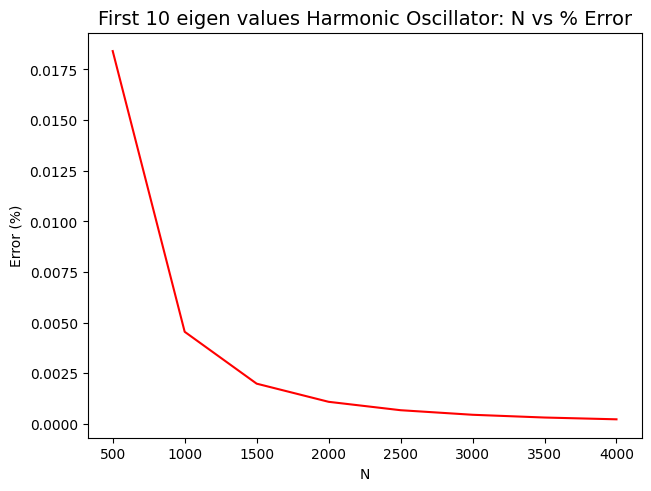

In [20]:
# input: array of test N values, output: plot

def N_vs_accuracy(N_test_values: np.ndarray) -> None:

    error_list = []

    for N in N_test_values:

        x_values = np.linspace(-6,6,int(N)) 
    
        v_values = potential_qho(x_values)

        on,off = hamiltonian_diag(x_values,v_values)

        expected_vals = expected_harmonic_eigen_val(10)

        # using hamilitionian in combination with sp.linalg.eigh_tridiagonal

        eigen_values, eigen_vectors = sp.linalg.eigh_tridiagonal(on,off)

        percentage_error = abs((1 - (eigen_values[0:10]/expected_vals)) * 100)

        error_list.append(np.mean(percentage_error))

    # plot

    fig,ax = plt.subplots()

    ax.plot(N_test_values,error_list,c='red')

    ax.set(title=r'First 10 eigen values Harmonic Oscillator: N vs % Error',xlabel='N',ylabel='Error (%)')

N_test_values = np.linspace(500,4000,8)

N_vs_accuracy(N_test_values)

plt.show()



### General Remarks
- By using NumPy, operations are carried out on entire arrays within one line of code and straightforward array-on-array operations are permitted. Both these features are relied upon to define the Hamiltonian matrix. In addition, methods such as np.linspace and np.zeros help define position and intensity (Part 4) arrays. 
- Most code is contained within functions, which is beneficial for a number of reasons: 1. It allows code to be re-used at any point in the notebook after the function's definition. 2. It enables fast-paced, repetitive analysis of test cases. 3. It improves readability. 
- Further practices to improve readability include defining argument and return types and adding comments within code cells and markdown notes. The online references scattered throughout are used to provide a deeper understanding of the code. 
- Using Matplotlib and Pandas, figures and tables have consistent formatting with clear titles, displaying any relevant information.


### Part 1

- When plotting the potential function, I found that a linspace defined as np.linspace(-5, 5, 100) well depicts the parabola while demonstrating the discrete nature of the work.

### Part 2

- The function hamiltonian() is written in accordance with the equations, using a for loop and if statements for off-diagonals at the boundary. This successfully completes the calculation, proven by the accuracy of eigenvalues in the next parts. To ensure the function matches the given description (and for simplicity), I make the assumption that all position values are spaced equally and that len(x) = len(v). For a more robust code, it might be necessary to catch errors if these assumptions are not satisfied.


### Part 3

- In part 3, scipy is introduced, and sp.linalg.eigh() is used to solve the eigenvalue problem. This solver is tested and compared in the extension. To compare eigenvalues to expected values, the equation $ (n + \frac{1}{2})\hbar{}\omega{} $ [1] is considered and adjusted to the units of the code ($\frac{1}{2}\hbar{}\omega{}$). These turn out to be odd integers and can be easily defined with np.linspace. The calculated and expected values are given in a table alongside a percentage error. I chose percentage error to give an easily readable/understandable accuracy. Pandas is used solely to help display the table.
- Plotting the wavefunctions simply required computing $\psi{}^*\cdot{}\psi{}$, and normalization can be checked with sum(). Plotting these wavefunctions showed that -6 to 6 is a suitable range to encapsulate the extremities for the first 10 eigenvalues.



### Part 4
- Following similar methods to part 3, a Coulomb potential is defined by the given equations and sp.linalg.eigh solves the eigenvalue problem. Again, the expected and computed values are compared in a table with percentage error for the same reason. The expected eigenvalues follow the equation $\frac{1}{n^2}$ obtained from [2] (Equation 4.70). Plotting the wavefunctions, I decided to produce 1D and 2D plots, ignoring the n = 0 case as it only gives a Dirac delta function at 0; $\delta{}(0)$. Plots for n = 1-5 use max R = 200 as given in the question but are displayed on a range dependent on n for clearer plots. 
- The 2D plots help visualize the nature of these distributions in 3D and hence how they exist in real-world space. The normalization of these plots is not checked, but not necessary as they do not correspond to calculated eigenvalues, etc. Defining the distribution in 2D uses an imperfect technique: Intensity is found using indices rather than precise calculations dependent on x and y. However, this prevents redefinition of any previous code and successfully demonstrates these distributions in 2D. The wave functions throughout this part are validated by [2] (Eg. Figure 4.8).


### Extension
- The extensions are mostly explained in detail within markdown cells nearby.
- E.1 was included to demonstrate the nature of plots with higher l values, essentially pushing the code we already had to more interesting cases. It uses essentially the same practices as Part 4 with the inclusion of the scipy spherical harmonic method and the n > l+1 condition found here [2] (Equation 4.84). Another important equation was the definition of m values obtained from [2] (Equation 4.29). 
- E.2, on the other hand, was included to help demonstrate understanding of the eigenvalue solver used, showing its performance relative to other solvers and demonstrating the importance of optimization with the final plot. This investigation is useful but minimal and definitely open for more research likely requiring access to the source code.


### References

[1] Griffiths, D.J. and Schroeter, D.F., 2018. Introduction to quantum mechanics. Cambridge university press. 2.3 The Harmonic Oscillator.

[2] Griffiths, D.J. and Schroeter, D.F., 2018. Introduction to quantum mechanics. Cambridge university press. 4.2 The Hydrogen Atom. 